In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import networkx as nx
import warnings


In [2]:
families_df = pd.read_csv ('families_short_version.csv')
families_df

,Name_Wals,ISO_Code_Wals,Genus,Family,Macro_Area,Countries_Wals,Endangerment,Number_Speakers,Latitude,Longitude
0,Qawasqar,alc,Alacalufan,Alacalufan,South America,Chile,Critically endangered,20.0,-49.6391,-74.3554
1,Fox,sac,Algonquian,Algic,North America,United States,Critically endangered,200.0,41.9637,-92.5768
2,Menomini,mez,Algonquian,Algic,North America,United States,Critically endangered,35.0,44.9356,-88.6144
3,Michif,crg,Algonquian,Algic,North America,Canada,Critically endangered,NaN,51.3119,-103.9790
4,Munsee,umu,Algonquian,Algic,North America,United States,Critically endangered,10.0,42.5700,-81.8790
5,Potawatomi,pot,Algonquian,Algic,North America,United States,Critically endangered,50.0,45.5601,-88.8300
6,Yurok,yur,Yurok,Algic,North America,United States,Critically endangered,12.0,41.0607,-124.1413
7,Arawak,arw,Caribbean Arawakan,Arawakan,South America,Suriname,Critically endangered,1750.0,6.2934,-58.0957
8,Baré,bae,Inland Northern Arawakan,Arawakan,South America,Venezuela Brazil,Critically endangered,2.0,0.4394,-68.2031
9,Baure,brg,Bolivia-Parana,Arawakan,South America,Bolivia,Critically endangered,55.0,-13.1008,-64.5007


In [22]:
test_df = pd.read_csv ('families_temp.csv')
test_df

,Name_Wals,ISO_Code_Wals,Genus,Family,Macro_Area,Countries_Wals,Endangerment,Number_Speakers,Latitude,Longitude
0,Qawasqar,alc,Alacalufan,Alacalufan,South America,Chile,Critically endangered,20.0,-49.6391,-74.3554
1,Fox,sac,Algonquian,Algic,North America,United States,Critically endangered,200.0,41.9637,-92.5768
2,Menomini,mez,Algonquian,Algic,North America,United States,Critically endangered,35.0,44.9356,-88.6144
3,Michif,crg,Algonquian,Algic,North America,Canada,Critically endangered,NaN,51.3119,-103.9790
4,Munsee,umu,Algonquian,Algic,North America,United States,Critically endangered,10.0,42.5700,-81.8790
5,Potawatomi,pot,Algonquian,Algic,North America,United States,Critically endangered,50.0,45.5601,-88.8300
6,Yurok,yur,Yurok,Algic,North America,United States,Critically endangered,12.0,41.0607,-124.1413
7,Arawak,arw,Caribbean Arawakan,Arawakan,South America,Suriname,Critically endangered,1750.0,6.2934,-58.0957
8,Baré,bae,Inland Northern Arawakan,Arawakan,South America,Venezuela Brazil,Critically endangered,2.0,0.4394,-68.2031


In [3]:
families_df.columns = ['name','code','genus',
                     'family','continent','country', 'endangerment', 'speakers', 'latitude', 'longitude']

In [5]:
families_df


,name,code,genus,family,continent,country,endangerment,speakers,latitude,longitude
0,Qawasqar,alc,Alacalufan,Alacalufan,South America,Chile,Critically endangered,20.0,-49.6391,-74.3554
1,Fox,sac,Algonquian,Algic,North America,United States,Critically endangered,200.0,41.9637,-92.5768
2,Menomini,mez,Algonquian,Algic,North America,United States,Critically endangered,35.0,44.9356,-88.6144
3,Michif,crg,Algonquian,Algic,North America,Canada,Critically endangered,NaN,51.3119,-103.9790
4,Munsee,umu,Algonquian,Algic,North America,United States,Critically endangered,10.0,42.5700,-81.8790
5,Potawatomi,pot,Algonquian,Algic,North America,United States,Critically endangered,50.0,45.5601,-88.8300
6,Yurok,yur,Yurok,Algic,North America,United States,Critically endangered,12.0,41.0607,-124.1413
7,Arawak,arw,Caribbean Arawakan,Arawakan,South America,Suriname,Critically endangered,1750.0,6.2934,-58.0957
8,Baré,bae,Inland Northern Arawakan,Arawakan,South America,Venezuela Brazil,Critically endangered,2.0,0.4394,-68.2031
9,Baure,brg,Bolivia-Parana,Arawakan,South America,Bolivia,Critically endangered,55.0,-13.1008,-64.5007


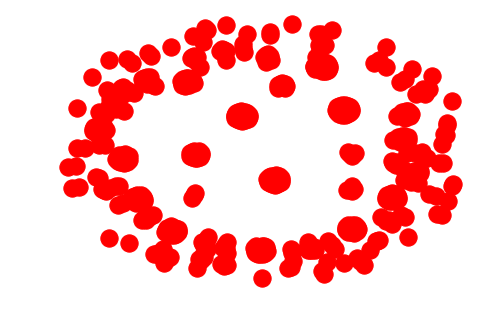

In [17]:
g = nx.from_pandas_edgelist(families_df, source='name', target='family', edge_attr='genus', create_using=None) 
nx.draw(g)

In [18]:
g.nodes()

NodeView(('Qawasqar', 'Alacalufan', 'Fox', 'Algic', 'Menomini', 'Michif', 'Munsee', 'Potawatomi', 'Yurok', 'Arawak', 'Arawakan', 'Baré', 'Baure', 'Resígaro', 'Tariana', 'Awa Pit', 'Barbacoan', 'Arikara', 'Caddoan', 'Caddo', 'Pawnee', 'Wichita', 'Jebero', 'Cahuapanan', 'Carijona', 'Cariban', 'Mapoyo', 'Cayuvava', 'Teribe', 'Chibchan', 'Tehuelche', 'Chon', 'Aleut', 'Eskimo-Aleut', 'Guató', 'Haida', 'Achumawi', 'Hokan', 'Kashaya', 'Kiliwa', 'Pomo (Central)', 'Pomo (Northern)', 'Bora', 'Huitotoan', 'Cayuga', 'Iroquoian', 'Oneida', 'Onondaga', 'Tuscarora', 'Itonama', 'Leko', 'Krenak', 'Macro-Ge', 'Xokleng', 'Guana', 'Mascoian', 'Itzaj', 'Mayan', 'Lacandón', 'Ahtna', 'Na-Dene', "Degexit'an", 'Hupa', 'Koyukon', 'Sarcee', 'Tanacross', 'Tanana', 'Tlingit', 'Upper Kuskokwim', 'Berbice Dutch Creole', 'other', 'Ixcatec', 'Oto-Manguean', 'Zapotec (Mixtepec)', 'Chinook (Lower)', 'Penutian', 'Maidu', 'Miwok (Central Sierra)', 'Miwok (Lake)', 'Miwok (Northern Sierra)', 'Miwok (Southern Sierra)', 'Nez 

In [19]:
g.edges()

EdgeView([('Qawasqar', 'Alacalufan'), ('Fox', 'Algic'), ('Algic', 'Menomini'), ('Algic', 'Michif'), ('Algic', 'Munsee'), ('Algic', 'Potawatomi'), ('Algic', 'Yurok'), ('Algic', 'Blackfoot'), ('Algic', 'Cheyenne'), ('Algic', 'Micmac'), ('Algic', 'Passamaquoddy'), ('Algic', 'Abenaki'), ('Algic', 'Arapaho'), ('Algic', 'Illinois'), ('Algic', 'Unami'), ('Algic', 'Wiyot'), ('Algic', 'Chippewa'), ('Algic', 'Kickapoo'), ('Algic', 'Ojibwa (Eastern)'), ('Algic', 'Shawnee'), ('Algic', 'Algonquin'), ('Algic', 'Atikamekw'), ('Algic', 'Cree (Plains)'), ('Algic', 'Cree (Swampy)'), ('Algic', 'Montagnais'), ('Algic', 'Naskapi'), ('Algic', 'Ojibwa (Severn)'), ('Arawak', 'Arawakan'), ('Arawakan', 'Baré'), ('Arawakan', 'Baure'), ('Arawakan', 'Resígaro'), ('Arawakan', 'Tariana'), ('Arawakan', 'Apurinã'), ('Arawakan', 'Curripaco'), ('Arawakan', 'Ignaciano'), ('Arawakan', 'Machiguenga'), ('Arawakan', 'Paresi'), ('Arawakan', 'Piapoco'), ('Arawakan', 'Piro'), ('Arawakan', 'Wapishana'), ('Arawakan', 'Yucuna'), (

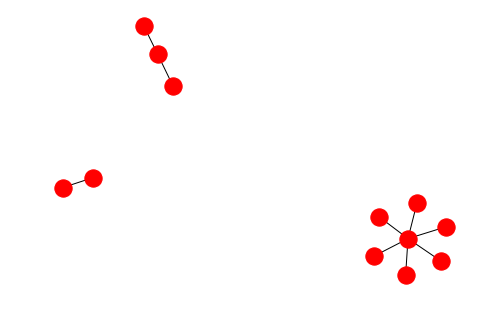

In [30]:
t = nx.from_pandas_edgelist(test_df, source='Name_Wals', target='Family', edge_attr=None, create_using=None) 
nx.draw(t)
